<a href="https://colab.research.google.com/github/kishoretvk/AIML/blob/main/GenAI-Support-System-CustomerCare-Automation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mid-term Project - Generative AI-powered Support Ticket Categorization


## venkata k Kishore Terli - Author

#### importing libraries for installing packages


#### Context
## Project Overview
In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships.

As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

## The Challenge
While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously.

## Solution: Large Language Models and Generative AI
One of the most effective strategies at your disposal as an organization is to harness the power of automated Support Ticket Categorization - done in the modern day using Large Language Models and Generative AI.

## Project Objective
Develop a Generative AI application using a Large Language Model to automate the classification and processing of support tickets. The application will aim to predict ticket categories, assign priority, suggest estimated resolution times, generate responses based on sentiment analysis, and store the results in a structured DataFrame.

In [1]:
!pip install huggingface_hub
!pip install llama-cpp-python
!pip install pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 MB 31.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 8.2 MB/s eta 0:00:00
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.2.78-cp310-cp310-linux_x86_64.whl size=3739629 sha256=89fe7109c5b2d4dbc35fc96213bbe3985238d2f4b3976d1b97d4a6e342fcf91a
  Stored in directory: /root/.cache/pip/wheels/fd/c5/bd/3b1c20081bd71ce9d28b562573c97915c790bf1ef231879a61
Successfully built llama-cpp-python


# Load the model from the hub
## install llama cpp python
# Model Interaction and Initialization

## Overview
This section of the notebook is dedicated to setting up the environment for interacting with a pre-trained model hosted on the Hugging Face Hub. The model in question is designed for instruction-based tasks and is part of the Mistral series, which is known for its capability to understand and generate human-like text based on given instructions.

## Importing Libraries and Classes
We begin by importing the necessary functions and classes that will allow us to interact with the model. This includes tools for downloading the model from the Hugging Face Hub and the specific class required to instantiate the model.

## Model Download
The model's repository ID on Hugging Face is specified, along with the basename of the model file. Using the `hf_hub_download` function, we download the model file to our local environment.

## Model Instantiation
Once the model file is downloaded, we instantiate the Llama class with the downloaded model file. This step is crucial as it prepares the model for interaction, allowing us to leverage its capabilities in subsequent tasks.

In [2]:
# Import the necessary functions and classes for model interaction
from huggingface_hub import hf_hub_download  # For downloading models from Hugging Face Hub
from llama_cpp import Llama  # Import the Llama class from the llama_cpp library

# Define the repository ID on Hugging Face where the model is hosted
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"

# Specify the basename of the model file, indicating its format
model_basename = "mistral-7b-instruct-v0.2.Q4_K_M.gguf"  # Update this to the actual GGUF model file name

# Download the model file using the 'hf_hub_download' function
model_file_path = hf_hub_download(repo_id=model_name_or_path, filename=model_basename)

# Instantiate the Llama class with the downloaded model file
# Instantiate the Llama class with the downloaded model file
llama_instance = Llama(
    model_path=model_file_path,
    n_threads=4,  # Number of CPU cores to use, adjust as needed
    n_batch=512,  # Batch size, should be between 1 and n_ctx
    n_gpu_layers=8,  # Number of layers to run on the GPU, adjust based on your GPU VRAM
    n_ctx=8192  # Context window size, adjust as needed
)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q4_K_M.gguf:   0%|          | 0.00/4.37G [00:00<?, ?B/s]

llama_model_loader: loaded meta data with 24 key-value pairs and 291 tensors from /root/.cache/huggingface/hub/models--TheBloke--Mistral-7B-Instruct-v0.2-GGUF/snapshots/3a6fbf4a41a1d52e415a4958cde6856d34b2db93/mistral-7b-instruct-v0.2.Q4_K_M.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = mistralai_mistral-7b-instruct-v0.2
llama_model_loader: - kv   2:                       llama.context_length u32              = 32768
llama_model_loader: - kv   3:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   4:                          llama.block_count u32              = 32
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loa

# Configure system message



## Objective
The Support Assistant is designed to automate the classification and initial response process for incoming support tickets. It streamlines customer service operations by quickly identifying the nature of the issue, assigning priority, estimating resolution times, and crafting sentiment-based replies.

## Output Fields
1. **Categories**: The ticket will be categorized into one of the following - Technical issue, Hardware issue, Data Recovery.
2. **Tags**: Relevant tags will be assigned to each ticket based on the content and category.
3. **Priority**: Each ticket will be assigned a priority level to ensure timely responses for urgent matters.
4. **Suggested ETA**: The system will provide an estimated time of arrival (ETA) for the resolution based on the category and priority.
5. **Generated 1st Reply**: A sentiment-based initial reply will be generated to address the customer's concern empathetically and efficiently.

In [8]:
# llama_instance = Llama(
#     model_path=model_file_path,
#     n_threads=4,  # Number of CPU cores to use, adjust as needed
#     n_batch=512,  # Batch size, should be between 1 and n_ctx
#     n_gpu_layers=8,  # Number of layers to run on the GPU, adjust based on your GPU VRAM
#     n_ctx=8192  # Context window size, adjust as needed
# )


In [3]:
import json
# System message after loading the model

system_message = """
## System Message

**Bot Identity:** I am an AI-powered Support Assistant designed to enhance customer service efficiency.

**Purpose:** My role is to automate the classification and processing of support tickets, predict categories, assign priority levels, estimate resolution times, generate sentiment-based responses, and organize data systematically.

**Output Fields:**
1. **Categories:** The ticket will be classified into one of the following - Technical issue, Hardware issue, Data Recovery.
2. **Tags:** Relevant tags will be assigned to the ticket based on the content for easy reference and searchability.
3. **Priority:** The ticket will be prioritized as Low, Medium, or High based on the urgency and impact of the issue.
4. **Suggested ETA:** An estimated time of resolution will be provided, considering the complexity and current queue.
5. **Generated 1st Reply:** A response will be generated based on the sentiment of the ticket, aiming to address the customer's concern empathetically and efficiently.
6. **Output Format:** The response will be provided in a JSON format with fields for category, tags, priority, suggested ETA, and the generated first reply.

Output Format: Provide the output in a JSON format containing the keys: category, tags, priority, eta, and response.
"""

# Print the system message
print(system_message)



## System Message

**Bot Identity:** I am an AI-powered Support Assistant designed to enhance customer service efficiency.

**Purpose:** My role is to automate the classification and processing of support tickets, predict categories, assign priority levels, estimate resolution times, generate sentiment-based responses, and organize data systematically.

**Output Fields:**
1. **Categories:** The ticket will be classified into one of the following - Technical issue, Hardware issue, Data Recovery.
2. **Tags:** Relevant tags will be assigned to the ticket based on the content for easy reference and searchability.
3. **Priority:** The ticket will be prioritized as Low, Medium, or High based on the urgency and impact of the issue.
4. **Suggested ETA:** An estimated time of resolution will be provided, considering the complexity and current queue.
5. **Generated 1st Reply:** A response will be generated based on the sentiment of the ticket, aiming to address the customer's concern empathetic

# First-Turn Template

In [4]:
# Assign the first-turn template to a variable
first_turn_template = {
  "Category": "Technical issue",
  "Tags": ["Internet", "Connectivity", "Speed"],
  "Priority": "High",
  "Suggested ETA": "2 hours",
  "Generated 1st Reply": "We understand how important a reliable internet connection is. Our team is already looking into this, and we aim to have an update for you within the next 2 hours."
}

# Print the first-turn template
print(first_turn_template)

{'Category': 'Technical issue', 'Tags': ['Internet', 'Connectivity', 'Speed'], 'Priority': 'High', 'Suggested ETA': '2 hours', 'Generated 1st Reply': 'We understand how important a reliable internet connection is. Our team is already looking into this, and we aim to have an update for you within the next 2 hours.'}


# pro template

In [143]:
# # System message template
# system_message = {
#     "Bot Identity": "AI-powered Support Assistant",
#     "Purpose": "Automate the classification and processing of support tickets",
#     "Output Fields": {
#         "Categories": ["Technical issue", "Hardware issue", "Data Recovery"],
#         "Tags": [],
#         "Priority": "",
#         "Suggested ETA": "",
#         "Generated 1st Reply": ""
#     }
# }

# # First-turn template based on user input
# first_turn_template = {
#     "Category": "Technical issue",
#     "Tags": ["Internet", "Connectivity", "Speed"],
#     "Priority": "High",
#     "Suggested ETA": "2 hours",
#     "Generated 1st Reply": "We understand how important a reliable internet connection is. Our team is already looking into this, and we aim to have an update for you within the next 2 hours."
# }

# # User input
# user_input = "my internet connection is slow"

# # Combine the system message, first-turn template, and user input
# prompt = f"""
# {system_message['Bot Identity']} - {system_message['Purpose']}
# User has reported an issue: {user_input}
# Based on the issue, the following response is generated:

# Category: {first_turn_template['Category']}
# Tags: {', '.join(first_turn_template['Tags'])}
# Priority: {first_turn_template['Priority']}
# Suggested ETA: {first_turn_template['Suggested ETA']}
# Generated 1st Reply: {first_turn_template['Generated 1st Reply']}
# """

# # Send the combined prompt to the LLM to generate an output
# # (This is a placeholder for the actual LLM call, which would depend on the specific LLM being used)
# llm_output = generate_llama_response(prompt)

# # Print the LLM output
# print(llm_output)


#Final Prompt

In [5]:
def generate_prompt(user_message, system_message, first_turn_template):
    final_prompt = {
        "User Message": user_message,
        "System Message": system_message,
        "First-Turn Template": first_turn_template
    }
    # Removed json.dumps to return a dictionary instead of a string
    return final_prompt

# Load the Dataset

In [7]:
import pandas as pd
df = pd.read_csv(r'/content/Midterm/Support_ticket_text_data_mid_term.csv')
#print head of the daset fo runderstanding
df.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


### let us see  information about the data loaded

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   support_tick_id      21 non-null     object
 1   support_ticket_text  21 non-null     object
dtypes: object(2)
memory usage: 464.0+ bytes


## 2 columns there with 21 rows and  are not null
### let us look at a first row to understand what data is it showing

In [9]:
df.head(1)

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...


### see the different columns

In [10]:
df.columns

Index(['support_tick_id', 'support_ticket_text'], dtype='object')

### check into data frame for null

In [11]:
print(df.isnull().sum())

support_tick_id        0
support_ticket_text    0
dtype: int64


### let us describe the dataset

In [12]:
df.describe().T

,count,unique,top,freq
support_tick_id,21,21,ST2023-006,1
support_ticket_text,21,21,My internet connection has significantly slowe...,1


In [13]:
df['support_ticket_text'][0]

'My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions. Please assist in resolving this connectivity issue promptly.'

# Define a function to generate responses using the Llama model

In [14]:
def generate_llama_response(support_ticket_text, systemprompt, first_turn_template):
    final_prompt = generate_prompt(support_ticket_text, systemprompt, first_turn_template)
    final_prompt_json = json.dumps(final_prompt)  # Convert the dictionary to a JSON string here
    response_generator = llama_instance(
        prompt=final_prompt_json,
        max_tokens=1200,
        temperature=0,
        top_p=0.95,
        #repetition_penalty=1.2,
        top_k=50,
        stop=["/s"],
        echo=False
    )

     # Assuming 'response_generator' is a dictionary returned by the Llama model,
    # extract the response text
    response_text = response_generator["choices"][0]['text'].strip()

    # Return the response text directly
    return response_text

# use the function to generate reponse and print it

In [15]:
df['llama_response_parsed'] = df['support_ticket_text'].apply(lambda text: generate_llama_response(text, system_message, first_turn_template))

# Print the head of the dataset for understanding
print(df.head())

# Print each response generated from the LLM
for index, row in df.iterrows():
    print(f"Response for ticket {index}: {row['llama_response_parsed']}")



llama_print_timings:        load time =   31229.88 ms
llama_print_timings:      sample time =      78.46 ms /   128 runs   (    0.61 ms per token,  1631.45 tokens per second)
llama_print_timings: prompt eval time =   31229.22 ms /   449 tokens (   69.55 ms per token,    14.38 tokens per second)
llama_print_timings:        eval time =   22624.20 ms /   127 runs   (  178.14 ms per token,     5.61 tokens per second)
llama_print_timings:       total time =   54024.08 ms /   576 tokens
Llama.generate: prefix-match hit

llama_print_timings:        load time =   31229.88 ms
llama_print_timings:      sample time =     139.54 ms /   226 runs   (    0.62 ms per token,  1619.65 tokens per second)
llama_print_timings: prompt eval time =   31661.42 ms /   443 tokens (   71.47 ms per token,    13.99 tokens per second)
llama_print_timings:        eval time =   40135.05 ms /   225 runs   (  178.38 ms per token,     5.61 tokens per second)
llama_print_timings:       total time =   72113.92 ms /   668 

  support_tick_id                                support_ticket_text  \
0      ST2023-006  My internet connection has significantly slowe...   
1      ST2023-007  Urgent help required! My laptop refuses to sta...   
2      ST2023-008  I've accidentally deleted essential work docum...   
3      ST2023-009  Despite being in close proximity to my Wi-Fi r...   
4      ST2023-010  My smartphone battery is draining rapidly, eve...   

                               llama_response_parsed  
0  ,"User Message":"My internet connection has si...  
1  ,"Output Format": {"Category": "Hardware issue...  
2  ,"Category":"Data Recovery","Tags":["Document ...  
3  ,"User Message":"Despite being in close proxim...  
4  ,"User Input": "My smartphone battery is drain...  
Response for ticket 0: ,"User Message":"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions.", "System Re

## take a look at generated reponse

In [21]:
df['llama_response_parsed'][0]

',"User Message":"My internet connection has significantly slowed down over the past two days, making it challenging to work efficiently from home. Frequent disconnections are causing major disruptions.", "System Response": {"Category": "Technical issue", "Tags": ["Internet", "Connectivity", "Speed"], "Priority": "High", "Suggested ETA": "2 hours", "Generated 1st Reply": "We understand how important a reliable internet connection is. Our team is already looking into this, and we aim to have an update for you within the next 2 hours."}}'

# generate a function to parse the ouput and transform them into regular coloumns

In [59]:
# Define a global list to store problematic JSON strings
problematic_jsons = []

def parse_system_response(json_str):
    global problematic_jsons  # Reference the global list

    # Attempt to correct common JSON formatting issues
    json_str = json_str.strip().lstrip(',')
    if not json_str.startswith('{'):
        json_str = '{' + json_str
    if not json_str.endswith('}'):
        json_str += '}'

    try:
        # Find the first occurrence of a complete JSON object
        end_index = json_str.find('}}') + 2
        if end_index != 1:
            # Extract the first complete JSON object
            json_str = json_str[:end_index]
        # Load the JSON string into a dictionary
        data = json.loads(json_str)

        # Determine the correct key for the system response
        response_key = None
        for key in ["System Response", "Output", "Bot Response", "Output Format"]:
            if key in data:
                response_key = key
                break

        # If no known response key is found, return empty values
        if not response_key:
            return ("", [], "", "", "")

        # Extract the response part of the dictionary
        response_data = data.get(response_key, {})

        # Return the values as a tuple
        return (
            response_data.get("Category", ""),
            response_data.get("Tags", []),
            response_data.get("Priority", ""),
            response_data.get("Suggested ETA", ""),
            response_data.get("Generated 1st Reply", "")
        )
    except json.JSONDecodeError as e:
        # Print the error and append the problematic JSON string to the global list
        print(f"JSON decoding error: {e}")
        problematic_jsons.append(json_str)  # Add to the global list
        # Return empty values in case of JSON parsing error
        return ("", [], "", "", "")

## 2nd parse json

In [86]:
import re

def preprocess_json(json_string):
    # Remove empty strings followed by an extra comma
    json_string = re.sub(r'""(?=\s*,)', '""', json_string)
    # Fix missing commas between key-value pairs
    json_string = re.sub(r'(?<="):(?=\s*")', ': ', json_string)
    # Fix missing commas between array items
    json_string = re.sub(r'(?<=\])(?=\s*\{)', ', ', json_string)
    # Remove trailing commas before closing brackets
    json_string = re.sub(r',(?=\s*[}\]])', '', json_string)
    # Fix extra data by wrapping separate objects in an array
    json_string = re.sub(r'(?<=\})(?=\s*\{)', '}, {', json_string)
    # Handle misplaced commas after empty strings
    json_string = re.sub(r'(?<=\s"")(,)(?=\s*["}\]])', '', json_string)
    return json_string

def parse_special_json(json_string):
    # Define default values for each column
    default_values = ('', [], '', '', '')
    try:
        # Preprocess the JSON string to fix common issues
        cleaned_json_string = preprocess_json(json_string)
        # Load the JSON data
        data = json.loads(cleaned_json_string)

        # Navigate to the nested 'Output Format' dictionary
        output_format = data.get('Input', {}).get('Output Format', {})

        # Extract the values or use default if key is not present
        category = output_format.get('Category', default_values[0])
        tags = output_format.get('Tags', default_values[1])
        priority = output_format.get('Priority', default_values[2])
        suggested_eta = output_format.get('Suggested ETA', default_values[3])
        generated_reply = output_format.get('Generated 1st Reply', default_values[4])

        # Return the values as a tuple
        return category, tags, priority, suggested_eta, generated_reply
    except json.JSONDecodeError as e:
        # Log the error and return default values
        print(f"JSON decoding error: {e} in JSON: {json_string}")
        return default_values


# apply function on the daset and merge them

In [60]:
# Apply the function to the 'llama_response_parsed' column and create new columns
df[['Category', 'Tags', 'Priority', 'Suggested ETA', 'Generated 1st Reply']] = df['llama_response_parsed'].apply(lambda x: pd.Series(parse_system_response(x)))


JSON decoding error: Expecting ',' delimiter: line 1 column 362 (char 361)
JSON decoding error: Expecting ',' delimiter: line 1 column 345 (char 344)
JSON decoding error: Expecting ',' delimiter: line 1 column 347 (char 346)
JSON decoding error: Extra data: line 1 column 1396 (char 1395)


## use 2nd function

In [87]:
# Assuming 'problematic_jsons' is a list containing the problematic JSON strings
leftover_results = [parse_special_json(json_str) for json_str in problematic_jsons]

# Create a DataFrame from the results
columns = ['Category', 'Tags', 'Priority', 'Suggested ETA', 'Generated 1st Reply']
leftover_df = pd.DataFrame(leftover_results, columns=columns)

# Concatenate the new DataFrame with the original DataFrame
# Make sure to reset the index to avoid duplication
df = pd.concat([df, leftover_df], ignore_index=True)

# problematic_jsons

JSON decoding error: Expecting ',' delimiter: line 1 column 288 (char 287) in JSON: {"Input": {"User Message": "My external hard drive isn't being recognized by my computer. I need assistance recovering vital data stored on it.", "Bot Identity": "I am an AI-powered Support Assistant designed to enhance customer service efficiency.", "Output Format": {"Category": "", "Tags": [], "Priority": "", "Suggested ETA": "", "Generated 1st Reply": ""}}
JSON decoding error: Expecting ',' delimiter: line 1 column 271 (char 270) in JSON: {"Input": {"User Message": "The graphics card in my gaming laptop seems to be malfunctioning, causing poor gaming performance.", "Bot Identity": "I am an AI-powered Support Assistant designed to enhance customer service efficiency.", "Output Format": {"Category": "", "Tags": [], "Priority": "", "Suggested ETA": "", "Generated 1st Reply": ""}}
JSON decoding error: Expecting ',' delimiter: line 1 column 273 (char 272) in JSON: {"Input": {"User Message": "My USB flash 

In [88]:
df.head()

,support_tick_id,support_ticket_text,llama_response_parsed,Category,Tags,Priority,Suggested ETA,Generated 1st Reply
0,ST2023-006,My internet connection has significantly slowe...,",""User Message"":""My internet connection has si...",Technical issue,"[Internet, Connectivity, Speed]",High,2 hours,We understand how important a reliable interne...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,",""Output Format"": {""Category"": ""Hardware issue...",Hardware issue,"[Laptop, Startup]",Urgent,4 hours,We're truly sorry for the inconvenience you're...
2,ST2023-008,I've accidentally deleted essential work docum...,",""Category"":""Data Recovery"",""Tags"":[""Document ...",,[],,,
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,",""User Message"":""Despite being in close proxim...",Technical issue,"[Internet, Connectivity, Speed]",High,2 hours,We understand how important a reliable interne...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",",""User Input"": ""My smartphone battery is drain...",,[],,,


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   support_tick_id        21 non-null     object
 1   support_ticket_text    21 non-null     object
 2   llama_response_parsed  21 non-null     object
 3   Category               21 non-null     object
 4   Tags                   21 non-null     object
 5   Priority               21 non-null     object
 6   Suggested ETA          21 non-null     object
 7   Generated 1st Reply    21 non-null     object
dtypes: object(8)
memory usage: 1.4+ KB


# create a new data frame and do EDA

In [89]:
# Create a new DataFrame without the 'llama_response_parsed' column
new_df = df.drop('llama_response_parsed', axis=1)

# Print the info of the new DataFrame to verify the change
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   support_tick_id      21 non-null     object
 1   support_ticket_text  21 non-null     object
 2   Category             69 non-null     object
 3   Tags                 69 non-null     object
 4   Priority             69 non-null     object
 5   Suggested ETA        69 non-null     object
 6   Generated 1st Reply  69 non-null     object
dtypes: object(7)
memory usage: 3.9+ KB
None


In [95]:
! pip install matplotlib==3.7.1 seaborn==0.13.1

In [96]:
# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## univaraint analysis

In [92]:
df['Category'].value_counts()

Category
                   60
Hardware issue      4
Technical issue     3
Data Recovery       2
Name: count, dtype: int64

In [94]:
df['Category'].nunique()

4

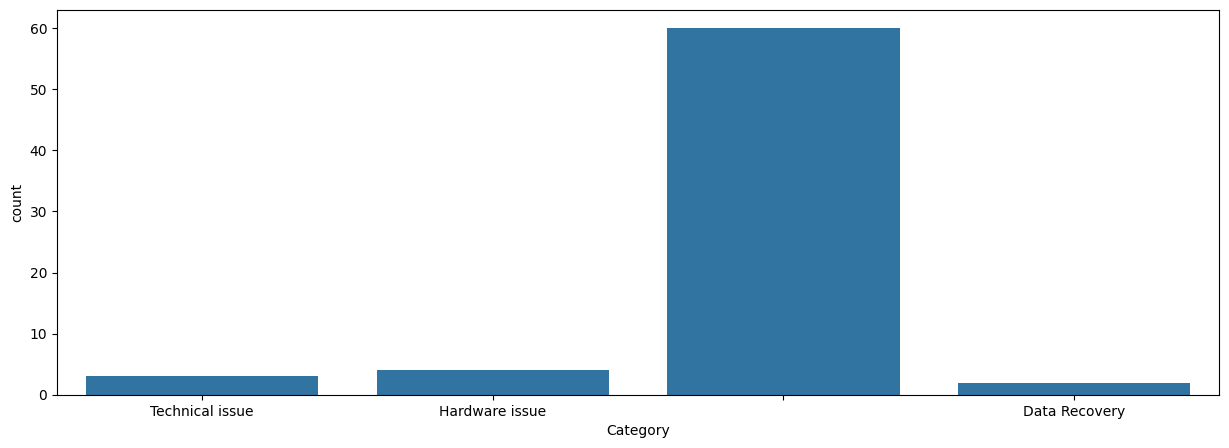

In [97]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'Category');

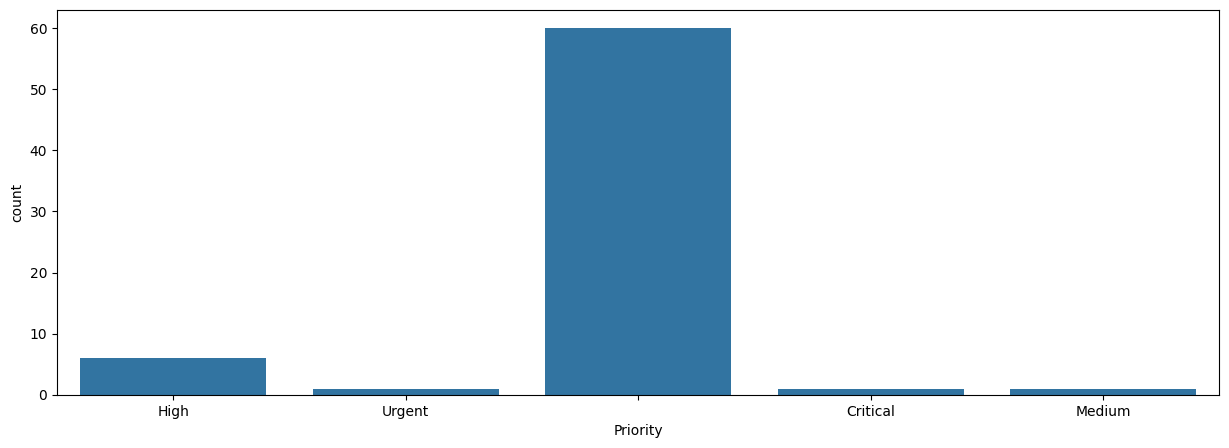

In [99]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'Priority');

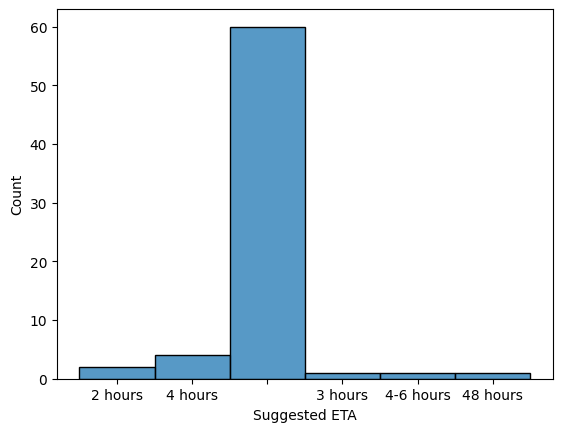

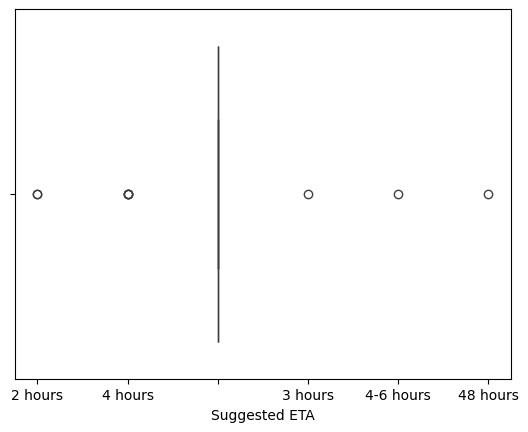

In [100]:
sns.histplot(data=df,x='Suggested ETA')
plt.show()
sns.boxplot(data=df,x='Suggested ETA')
plt.show()

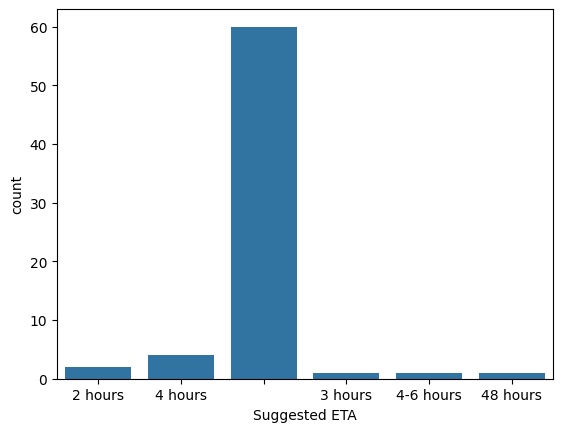

In [101]:
sns.countplot(data = df, x = 'Suggested ETA');


# top 2 categories

In [102]:
df['Category'].value_counts().head(5)


Category
                   60
Hardware issue      4
Technical issue     3
Data Recovery       2
Name: count, dtype: int64

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   support_tick_id        21 non-null     object
 1   support_ticket_text    21 non-null     object
 2   llama_response_parsed  21 non-null     object
 3   Category               69 non-null     object
 4   Tags                   69 non-null     object
 5   Priority               69 non-null     object
 6   Suggested ETA          69 non-null     object
 7   Generated 1st Reply    69 non-null     object
dtypes: object(8)
memory usage: 4.4+ KB


# bi variant analysis

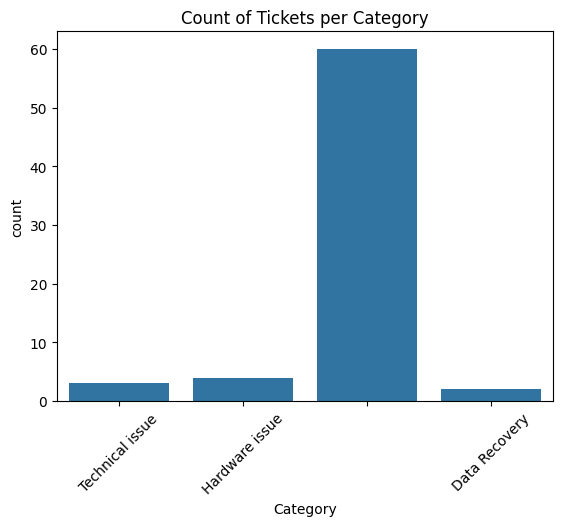

In [123]:
# Count plot with Seaborn
sns.countplot(data=df, x='Category')
plt.title('Count of Tickets per Category')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()